# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observable Trends

1) Although similar, southern hemisphere cities tend to have a slightly milder climate in comparison to cities at the same latitude in the northern hemisphere. This is observed in the linear regression figures for max temperatures of both hemispheres.

2) As expected, the highest temperature is always found at 0 latitude. As latitude increases or decreases, temperature will drop. That is the case due to the direct sunlight exposure in cities on or near the equator. 

3) The latitude of the city does not have a distinguishable effect on wind speed nor cloudiness.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [3]:
#Create lists and counters
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Build a parameter and url in order to request results in Farhenheit
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

params = {
    'appid':weather_api_key,
    'units':units
}

In [5]:
print("Beginning Data Retrieval ")
print("-------------------------")

#Loop through the cities
for index, city in enumerate(cities, start = 1):
    try:
        params['q'] = city
        response = requests.get(url=base_url, params=params)
        request_url = response.url
        data = response.json()
        city_name_list.append(data["name"])
        cloudiness_list.append(data["clouds"]["all"])
        country_list.append(data["sys"]["country"])
        date_list.append(data["dt"])
        humidity_list.append(data["main"]["humidity"])
        lat_list.append(data["coord"]["lat"])
        lng_list.append(data["coord"]["lon"])
        max_temp_list.append(data['main']['temp_max'])
        wind_speed_list.append(data["wind"]["speed"])
        
        if counter > 49:
            counter = 0
            set_counter = set_counter + 1
    
        else:
            counter = counter + 1
            
        print(f"Processing Record {counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval 
-------------------------
Processing Record 1 of Set 1 : suluq
City not found. Skipping...
Processing Record 2 of Set 1 : bethel
Processing Record 3 of Set 1 : busselton
Processing Record 4 of Set 1 : punta arenas
City not found. Skipping...
Processing Record 5 of Set 1 : mataura
Processing Record 6 of Set 1 : takoradi
Processing Record 7 of Set 1 : haines junction
City not found. Skipping...
Processing Record 8 of Set 1 : atuona
Processing Record 9 of Set 1 : chifeng
Processing Record 10 of Set 1 : cherskiy
Processing Record 11 of Set 1 : cape town
Processing Record 12 of Set 1 : hithadhoo
Processing Record 13 of Set 1 : dandong
Processing Record 14 of Set 1 : kruisfontein
Processing Record 15 of Set 1 : pevek
Processing Record 16 of Set 1 : kahului
Processing Record 17 of Set 1 : ribeira grande
Processing Record 18 of Set 1 : xining
Processing Record 19 of Set 1 : port alfred
Processing Record 20 of Set 1 : kabompo
Processing Record 21 of Set 1 : jamestown
P

Processing Record 34 of Set 4 : muscle shoals
Processing Record 35 of Set 4 : ndele
Processing Record 36 of Set 4 : santa maria del oro
Processing Record 37 of Set 4 : khatanga
Processing Record 38 of Set 4 : isangel
Processing Record 39 of Set 4 : gulfport
Processing Record 40 of Set 4 : buchanan
Processing Record 41 of Set 4 : bonthe
Processing Record 42 of Set 4 : port elizabeth
Processing Record 43 of Set 4 : coquimbo
Processing Record 44 of Set 4 : ambo
Processing Record 45 of Set 4 : klaksvik
Processing Record 46 of Set 4 : anadyr
Processing Record 47 of Set 4 : huarmey
City not found. Skipping...
Processing Record 48 of Set 4 : khandbari
Processing Record 49 of Set 4 : quelimane
Processing Record 50 of Set 4 : turukhansk
Processing Record 0 of Set 5 : maple creek
Processing Record 1 of Set 5 : richards bay
Processing Record 2 of Set 5 : cairo
Processing Record 3 of Set 5 : longkou
Processing Record 4 of Set 5 : carnarvon
Processing Record 5 of Set 5 : egvekinot
Processing Record

Processing Record 19 of Set 8 : mirpur sakro
Processing Record 20 of Set 8 : college
Processing Record 21 of Set 8 : mountain home
Processing Record 22 of Set 8 : praia da vitoria
Processing Record 23 of Set 8 : beloha
Processing Record 24 of Set 8 : sao joao da barra
Processing Record 25 of Set 8 : byron bay
Processing Record 26 of Set 8 : mount isa
Processing Record 27 of Set 8 : waipawa
Processing Record 28 of Set 8 : sisimiut
Processing Record 29 of Set 8 : manokwari
Processing Record 30 of Set 8 : filadelfia
Processing Record 31 of Set 8 : palmeirais
Processing Record 32 of Set 8 : whitianga
Processing Record 33 of Set 8 : lermontovka
Processing Record 34 of Set 8 : patnagarh
Processing Record 35 of Set 8 : warmbad
Processing Record 36 of Set 8 : tupik
Processing Record 37 of Set 8 : champerico
Processing Record 38 of Set 8 : lachi
Processing Record 39 of Set 8 : chumikan
Processing Record 40 of Set 8 : conde
Processing Record 41 of Set 8 : axim
Processing Record 42 of Set 8 : tab

Processing Record 4 of Set 12 : villa guerrero
Processing Record 5 of Set 12 : port-gentil
City not found. Skipping...
Processing Record 6 of Set 12 : yerbogachen
Processing Record 7 of Set 12 : kamenka
City not found. Skipping...
Processing Record 8 of Set 12 : sao desiderio
Processing Record 9 of Set 12 : pahrump
Processing Record 10 of Set 12 : calamar
Processing Record 11 of Set 12 : zhengjiatun
Processing Record 12 of Set 12 : ejura
Processing Record 13 of Set 12 : yenagoa
Processing Record 14 of Set 12 : joetsu
Processing Record 15 of Set 12 : smithers
Processing Record 16 of Set 12 : astana
Processing Record 17 of Set 12 : harper
Processing Record 18 of Set 12 : road town
Processing Record 19 of Set 12 : baykit
Processing Record 20 of Set 12 : clarence town
Processing Record 21 of Set 12 : yumen
-----------------------
Data Retrieval Complete
-----------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a panda data frame using data retrieved
cities_weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp (F)" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [7]:
# Count data
cities_weather_dict.count()

City            582
Cloudiness      582
Country         582
Date            582
Humidity        582
Lat             582
Lng             582
Max Temp (F)    582
Wind Speed      582
dtype: int64

In [8]:
cities_weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed
0,Qaryat Sulūq,0,LY,1632688884,59,31.6682,20.2521,73.09,11.97
1,Bethel,40,US,1632688884,52,41.3712,-73.4140,71.69,1.01
2,Busselton,80,AU,1632688884,89,-33.6500,115.3333,57.04,14.76
3,Punta Arenas,40,CL,1632688885,53,-53.1500,-70.9167,48.31,18.41
4,Mataura,5,NZ,1632688885,70,-46.1927,168.8643,41.49,2.15
...,...,...,...,...,...,...,...,...,...
577,Harper,100,LR,1632689074,91,4.3750,-7.7169,75.69,7.38
578,Road Town,20,VG,1632688910,62,18.4167,-64.6167,89.64,5.75
579,Baykit,100,RU,1632689075,82,61.6700,96.3700,35.73,8.03
580,Clarence Town,8,AU,1632689075,80,-32.5833,151.7833,54.81,2.04


In [9]:
#Save this dataframe data into a csv file
cities_weather_dict.to_csv('../output_data/cities.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
cities_weather_dict.loc[cities_weather_dict['Humidity'] >= 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed
103,Kiryat Gat,0,IL,1632688918,100,31.6100,34.7642,78.91,4.68
116,Petropavlovsk-Kamchatskiy,0,RU,1632688922,100,53.0452,158.6483,36.19,6.71
127,Kiunga,100,PG,1632688926,100,-6.1219,141.2906,73.78,0.94
137,Piltene,17,LV,1632688929,100,57.2243,21.6744,40.95,0.00
239,Sri Aman,100,MY,1632688963,100,1.2376,111.4621,77.09,0.00
366,Dongli,20,CN,1632689005,100,23.5656,116.8194,75.18,2.24


In [11]:
#All cities either have a humidity <= 100%, nothing higher.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

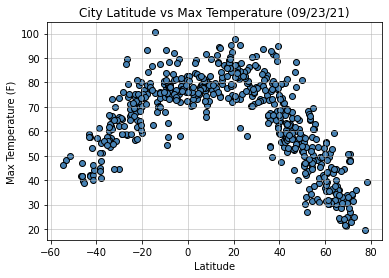

In [12]:
#Generate a scatter plot
plt.scatter(cities_weather_dict['Lat'], cities_weather_dict['Max Temp (F)'], marker='o', facecolor='steelblue', edgecolor='black')

#Add required labels
plt.title(f'City Latitude vs Max Temperature (09/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Set grid lines
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

#Save plot as an image
plt.savefig("../Images/Latitude vs Max Temperature.png")

This plot is looking at the relationship between latitude and temperature. As the latitude approaches 0 (the equator), the higher the temperature becomes. As The latitude fluctuates below or above 0, the temperature drops.

## Latitude vs. Humidity Plot

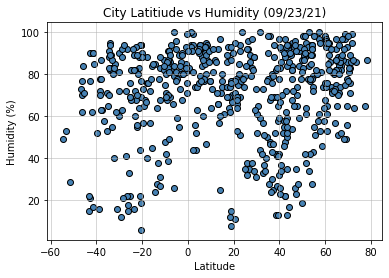

In [13]:
#Generate a scatter plot
plt.scatter(cities_weather_dict['Lat'], cities_weather_dict['Humidity'], marker='o', facecolor='steelblue', edgecolor='black')

#Add required labels
plt.title(f'City Latitiude vs Humidity (09/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Set grid lines
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

#Save plot as an image
plt.savefig("../Images/Latitude vs Humidity.png")

This plot is looking at the relationship between latitude and humidity percentage. It emphasizes that humidity is not necessarily defined by the latitude of a region.

## Latitude vs. Cloudiness Plot

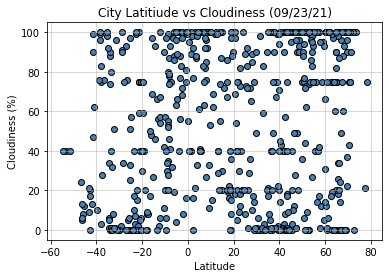

In [14]:
#Generate a scatter plot
plt.scatter(cities_weather_dict['Lat'], cities_weather_dict['Cloudiness'], marker='o', facecolor='steelblue', edgecolor='black')

#Add required labels
plt.title(f'City Latitiude vs Cloudiness (09/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Set grid lines
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

#Save plot as an image
plt.savefig("../Images/Latitude vs Cloudiness.png")

This plot is looking at the relationship between latitude and cloudiness percentage. It is demonstrating that cloudiness data is widely spread across the latitude, similarly to humidity.

## Latitude vs. Wind Speed Plot

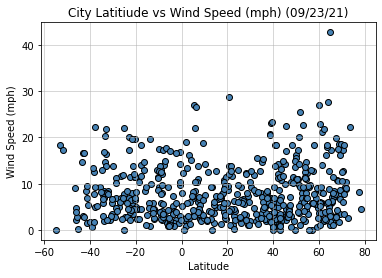

In [15]:
#Generate a scatter plot
plt.scatter(cities_weather_dict['Lat'], cities_weather_dict['Wind Speed'], marker='o', facecolor='steelblue', edgecolor='black')

#Add required labels
plt.title(f'City Latitiude vs Wind Speed (mph) (09/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#Set grid lines
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

#Save plot as an image
plt.savefig("../Images/Latitude vs Wind Speed.png")

This plot is looking at the relationship between latitude and wind speed in mph. Due to the way the data is spread, it slightly shows that the further away from the equator, generally the wind speed is higher. 

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = cities_weather_dict.loc[cities_weather_dict["Lat"] >= 0]
southern_hemisphere = cities_weather_dict.loc[cities_weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is:-0.83


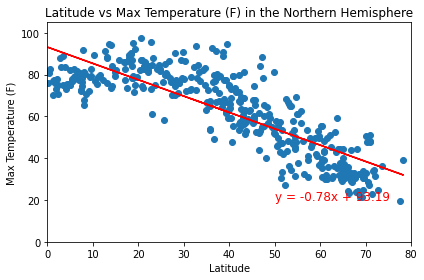

In [17]:
#Define x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp (F)"]

#Create the line regression, line equation and r value
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-squared value is:{round(st.pearsonr(x_values,y_values)[0],2)}')

#Create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")

#Add required labels
plt.title('Latitude vs Max Temperature (F) in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Set limits
plt.ylim(0, 105)
plt.xlim(0, 80)

#Save plot as an image
plt.savefig("../Images/N_H Latitude vs Max Temperature.png")

#Print plot
plt.tight_layout()
plt.show()

The relationship between latitude and max temperature for northern hemisphere cities is strongly negative, given that it's r-squared value is very close to -1. The closer the city to the equator (at 0) the higher the max temperature, which further supports the fundamental ask of how the weather is in cities near the equator. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is:0.77


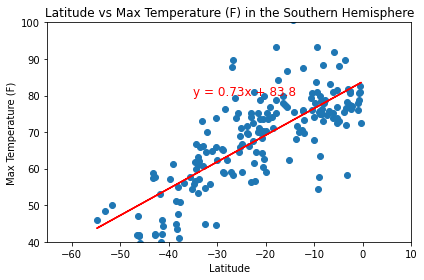

In [18]:
#Define x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp (F)"]

#Create the line regression, line equation and r value
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-squared value is:{round(st.pearsonr(x_values,y_values)[0],2)}')

#Create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")

#Add required labels
plt.title('Latitude vs Max Temperature (F) in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Set limits
plt.ylim(40, 100)
plt.xlim(-65,10)

#Save plot as an image
plt.savefig("../Images/S_H Latitude vs Max Temperature.png")

#Print plot
plt.tight_layout()
plt.show()

The relationship between latitude and max temperature for southern hemisphere cities is relatively strong, given that it's r-squared value is above 0.7. The closer the city to the equator (at 0) the higher the max temperature, which further supports the fundamental ask of how the weather is in cities near the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is:0.05


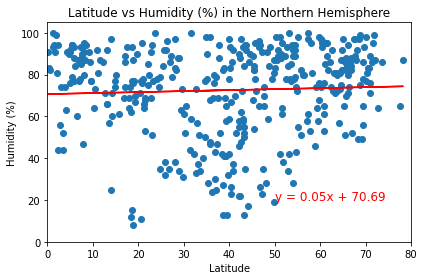

In [19]:
#Define x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

#Create the line regression, line equation and r value
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-squared value is:{round(st.pearsonr(x_values,y_values)[0],2)}')

#Create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")

#Add required labels
plt.title('Latitude vs Humidity (%) in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Set limits
plt.ylim(0, 105)
plt.xlim(0, 80)

#Save plot as an image
plt.savefig("../Images/N_H Latitude vs Humidity.png")

#Print plot
plt.tight_layout()
plt.show()

The relationship between latitude and the humidity percentage for northern hemisphere cities is very weakly positive, given that it's r-squared value is very close to 0. There seems to be no concrete relationship in regards to humidity levels amongst the cities and their location.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is:0.22


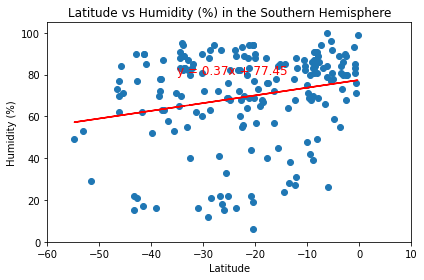

In [20]:
#Define x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

#Create the line regression, line equation and r value
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-squared value is:{round(st.pearsonr(x_values,y_values)[0],2)}')

#Create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")

#Add required labels
plt.title('Latitude vs Humidity (%) in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Set limits
plt.ylim(0, 105)
plt.xlim(-60,10)

#Save plot as an image
plt.savefig("../Images/S_H Latitude vs Humidity.png")

#Print plot
plt.tight_layout()
plt.show()

The relationship between latitude and the humidity percentage for southern hemisphere cities is very weak as well, given that it's r-squared value is very close to 0. There seems to be no concrete relationship in regards to humidity levels amongst the cities and their location.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is:0.02


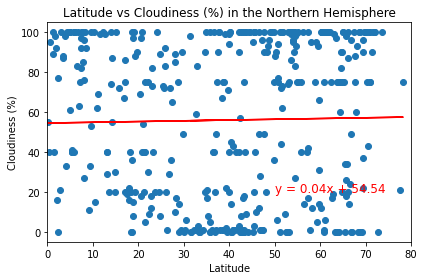

In [21]:
#Define x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

#Create the line regression, line equation and r value
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-squared value is:{round(st.pearsonr(x_values,y_values)[0],2)}')

#Create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")

#Add required labels
plt.title('Latitude vs Cloudiness (%) in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Set limits
plt.ylim(-5, 105)
plt.xlim(0, 80)

#Save plot as an image
plt.savefig("../Images/N_H Latitude vs Cloudiness.png")

#Print plot
plt.tight_layout()
plt.show()

The relationship between latitude and the cloudiness percentage for northern hemisphere cities is very weakly positive, given that it's r-squared value is very close to 0. There seems to be no concrete relationship in regards to cloudiness amongst the cities and their location.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is:0.28


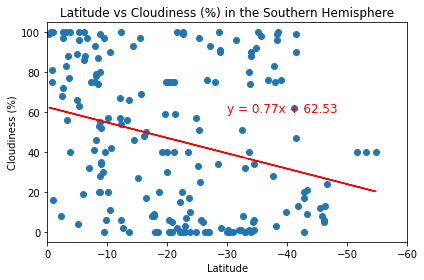

In [22]:
#Define x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

#Create the line regression, line equation and r value
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-squared value is:{round(st.pearsonr(x_values,y_values)[0],2)}')

#Create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")

#Add required labels
plt.title('Latitude vs Cloudiness (%) in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Set limits
plt.ylim(-5, 105)
plt.xlim(0, -60)

#Save plot as an image
plt.savefig("../Images/S_H Latitude vs Cloudiness.png")

#Print plot
plt.tight_layout()
plt.show()

The relationship between latitude and the cloudiness percentage for southern hemisphere cities is very weak as well, given that it's r-squared value is very close to 0. There seems to be no concrete relationship in regards to cloudiness amongst the cities and their location.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is:0.13


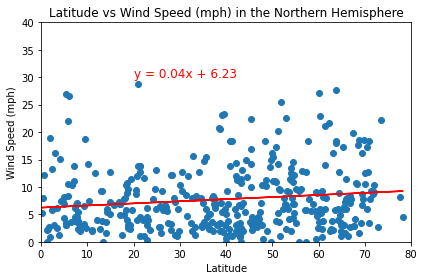

In [23]:
#Define x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

#Create the line regression, line equation and r value
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-squared value is:{round(st.pearsonr(x_values,y_values)[0],2)}')

#Create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=12,color="red")

#Add required labels
plt.title('Latitude vs Wind Speed (mph) in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#Set limits
plt.ylim(0,40)
plt.xlim(0, 80)

#Save plot as an image
plt.savefig("../Images/N_H Latitude vs Wind Speed.png")

#Print plot
plt.tight_layout()
plt.show()

The relationship between latitude and the wind speed in mph for northern hemisphere cities is very weakly positive, given that it's r-squared value is very close to 0. There seems to be no concrete relationship in regards to wind speed amongst the cities and their location given how scattered the data seems. There is a very minimal increase in wind speed when the city is further away from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is:-0.09


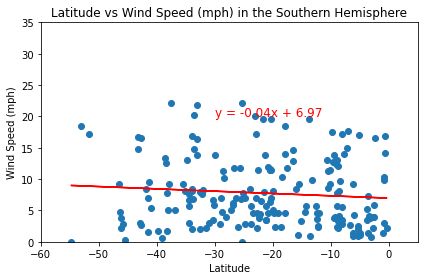

In [24]:
#Define x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

#Create the line regression, line equation and r value
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-squared value is:{round(st.pearsonr(x_values,y_values)[0],2)}')

#Create the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")

#Add required labels
plt.title('Latitude vs Wind Speed (mph) in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#Set limits
plt.ylim(0,35)
plt.xlim(-60,5)

#Save plot as an image
plt.savefig("../Images/S_H Latitude vs Wind Speed.png")

#Print plot
plt.tight_layout()
plt.show()

The relationship between latitude and the wind speed in mph for southern hemisphere cities is very weakly negative, given that it's r-squared value is very close to 0. There seems to be no concrete relationship in regards to wind speed amongst the cities and their location due to how scattered the data is.